Ejemplo --- Clasificación del Fashion MNIST dataset
===

* *30 min* | Última modificación: Julio 09, 2019

Basado en: https://www.tensorflow.org/tutorials/keras/classification

![assets/fashion-mnist-sprite.png](assets/fashion-mnist-sprite.png)

## Importación de librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.1.0


## Carga y configuración del dataset

In [2]:
#
#  Descarga de los datos
#
(
    (train_images, train_labels),
    (test_images, test_labels),
) = keras.datasets.fashion_mnist.load_data()

#
#  Nombres de las clases
#
class_names = [  
    "T-shirt/top", 
    "Trouser",  
    "Pullover", 
    "Dress",  
    "Coat",  
    "Sandal", 
    "Shirt",  
    "Sneaker", 
    "Bag", 
    "Ankle boot", 
]

## Exploración de los datos

In [3]:
#
#  Cantidad de patrones de entrenamiento
#
print(train_images.shape, "\n", len(train_labels))

(60000, 28, 28) 
 60000


In [4]:
#
#  Cantidad de patrones de prueba
#
print(test_images.shape, "\n", len(test_labels))

(10000, 28, 28) 
 10000


## Preprocesamiento

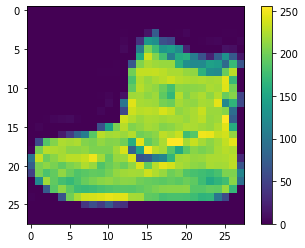

In [5]:
#
#  Las figuras son de 28x28 pixels, y el
#  color va entre 0 y 255
#
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
#
#  Normalización del color al rango [0, 1]
#
train_images = train_images / 255.0
test_images = test_images / 255.0

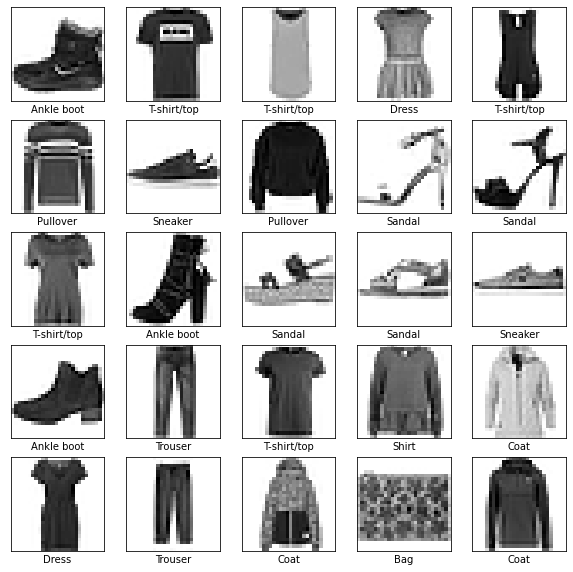

In [7]:
#
# Ejemplos de las figuras que contiene el dataset
#
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Construcción del modelo usando Keras

In [8]:
#
#  Configuración de las capas
#
model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation=tf.nn.relu),
        keras.layers.Dense(10, activation=tf.nn.softmax),
    ]
)

#
# Características del modelo creado
#
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Compilación del modelo

In [9]:
#
#  Compilación del modelo
#
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

## Entrenamiento

In [10]:
#
#  history almacena la información relacionada con el entrenamiento
#
history = model.fit(train_images, train_labels, epochs=20, verbose=1)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 119us/sample - loss: 1.7149 - accuracy: 0.7534
Epoch 2/20
60000/60000 [==============================] - 7s 110us/sample - loss: 1.6740 - accuracy: 0.7886
Epoch 3/20
60000/60000 [==============================] - 7s 110us/sample - loss: 1.6642 - accuracy: 0.7981
Epoch 4/20
60000/60000 [==============================] - 7s 113us/sample - loss: 1.6592 - accuracy: 0.8027
Epoch 5/20
60000/60000 [==============================] - 7s 118us/sample - loss: 1.6537 - accuracy: 0.8074
Epoch 6/20
60000/60000 [==============================] - 6s 107us/sample - loss: 1.6497 - accuracy: 0.8117
Epoch 7/20
60000/60000 [==============================] - 6s 103us/sample - loss: 1.6478 - accuracy: 0.8140
Epoch 8/20
60000/60000 [==============================] - 6s 103us/sample - loss: 1.6456 - accuracy: 0.8160
Epoch 9/20
60000/60000 [==============================] - 6s 105us/sample - loss: 1.6425 - accuracy: 0.8193
Epoch

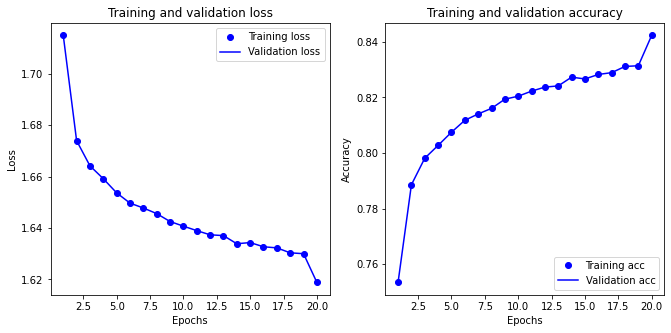

In [11]:
def plot_history(history):

    plt.figure(figsize=(11, 5))

    history_dict = history.history

    acc = history_dict["accuracy"]
    val_acc = history_dict["accuracy"]
    loss = history_dict["loss"]
    val_loss = history_dict["loss"]

    #
    # loss
    #
    plt.subplot(1, 2, 1)
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, loss, "bo", label="Training loss")
    plt.plot(epochs, val_loss, "b", label="Validation loss")
    plt.title("Training and validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    #
    # accuracy
    #
    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc, "bo", label="Training acc")
    plt.plot(epochs, val_acc, "b", label="Validation acc")
    plt.title("Training and validation accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(loc="lower right")


plot_history(history)

## Evaluación

In [12]:
results = model.evaluate(test_images, test_labels, verbose=1)
for name, value in zip(model.metrics_names, results):
    print("%s: %.3f" % (name, value))

10000/10000 [==============================] - 1s 68us/sample - loss: 1.6008 - accuracy: 0.8602
loss: 1.601
accuracy: 0.860


## Pronóstico para todo el conjunto de prueba

In [13]:
#
#  Realiza la predicción para el conjunto de test
#
predictions = model.predict(test_images)

## Pronóstico para imágenes individuales

In [14]:
#
#  Valores asignados a cada una de las clases
#  para el primer ejemplo
#
predictions[0]

array([2.4072923e-17, 2.8198568e-18, 9.4907002e-19, 9.1575802e-23,
       1.1441237e-12, 2.1461597e-06, 1.2799709e-19, 3.5410554e-08,
       3.3214514e-17, 9.9999785e-01], dtype=float32)

In [15]:
#
#  Suma de los valores asignados a cada clase para el primer
#  ejemplo. Puede asimilarse a probabilidad.
#
sum(predictions[0])

1.0000000358041456

In [16]:
#
#  Label para el que se produce el valor más alto para el primer ejemplo
#
np.argmax(predictions[0])

9

In [17]:
#
#  Grafica la imagen
#
def plot_image(i, predictions_array, true_label, img):

    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = "blue"
    else:
        color = "red"

    plt.xlabel(
        "{} {:2.0f}% ({})".format(
            class_names[predicted_label],
            100 * np.max(predictions_array),
            class_names[true_label],
        ),
        color=color,
    )


#
#  Grafica un diagrama de barras con la probabilidad
#  asignada a cada label
#
def plot_value_array(i, predictions_array, true_label):

    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    #
    # La clase real es azul
    #
    thisplot[predicted_label].set_color("red")

    #
    # El pronóstico es azul
    #
    thisplot[true_label].set_color("blue")

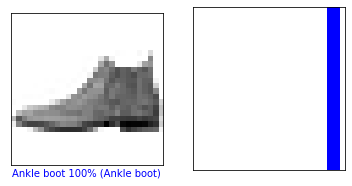

In [18]:
#
#  Ejemplo para la imagen 0 del conjunto de test
#
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

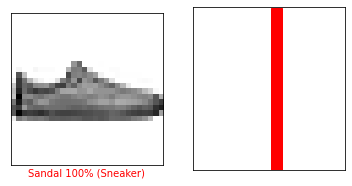

In [19]:
#
#  Ejemplo para la imagen 12 del conjunto de test
#
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

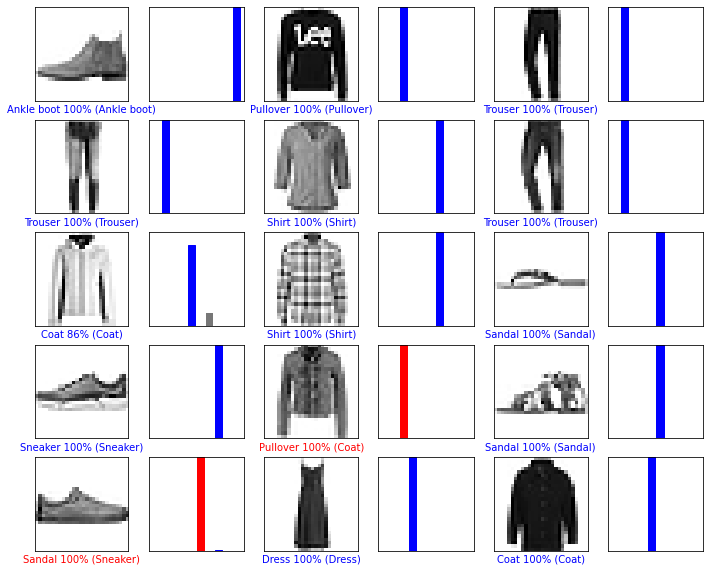

In [20]:
#
#  Evaluación de las primeras 15 imagenes, etiqueta pronosticada y
#  etiqueta verdadera. Etiqueta correcta en azul, equivocada en rojo.
#
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [21]:
#
#  Imagen a ser pronosticada
#
img = test_images[0]
img.shape  # tamaño

(28, 28)

In [22]:
#
#  Keras está optimizado para generar pronósticos
#  sobre colecciones, por lo que debe crearse una
#  colección de una sola figura
#
img = np.expand_dims(img, 0)
img.shape

(1, 28, 28)

In [23]:
predictions_single = model.predict(img)

print(predictions_single, "\n\n", np.argmax(predictions_single))

[[2.4073105e-17 2.8198353e-18 9.4907726e-19 9.1575802e-23 1.1441259e-12
  2.1461597e-06 1.2799660e-19 3.5410622e-08 3.3214514e-17 9.9999785e-01]] 

 9


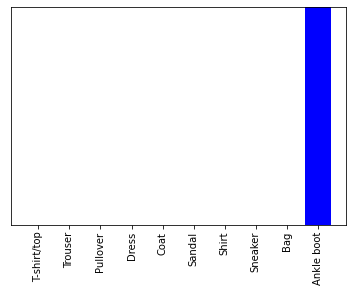

In [24]:
plot_value_array(0, predictions_single, test_labels)

_ = plt.xticks(range(10), class_names, rotation=90)

**Ejercicio.---** ¿Cómo varía la precisión del modelo con la cantidad de neuronas de la capa oculta?